<a href="https://colab.research.google.com/github/RyanAlGhifari2211533014/Pembelajaran-Mesin-Ryan-Al-Ghifari-2211533014/blob/main/Pekan_7_ML_Tugas_Clustering_K_Means_silhouette_Ryan_Al_Ghifari.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import library yang diperlukan
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Membaca dataset "Pekan3.csv" yang sudah diunggah
df = pd.read_csv('Pekan3.csv')

# Tampilkan beberapa baris pertama dari dataset untuk memastikan data telah dimuat dengan benar
print(df.head())





                                        Product Name Product ID  \
0  Women's adidas Originals NMD_Racer Primeknit S...     AH2430   
1               Women's adidas Originals Sleek Shoes     G27341   
2                  Women's adidas Swim Puka Slippers     CM0081   
3   Women's adidas Sport Inspired Questar Ride Shoes     B44832   
4           Women's adidas Originals Taekwondo Shoes     D98205   

   Listing Price  Sale Price  Discount                    Brand  Rating  \
0          14999        7499        50  Adidas Adidas ORIGINALS     4.8   
1           7599        3799        50         Adidas ORIGINALS     3.3   
2            999         599        40        Adidas CORE / NEO     2.6   
3           6999        3499        50        Adidas CORE / NEO     4.1   
4           7999        3999        50         Adidas ORIGINALS     3.5   

   Reviews  
0       41  
1       24  
2       37  
3       35  
4       72  


In [ ]:
# Memilih hanya kolom numerik untuk clustering
df_numeric = df.select_dtypes(include=[np.number])

# Standarisasi data agar lebih seimbang dalam clustering
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_numeric)

# Menentukan rentang jumlah kluster yang ingin diuji
range_n_clusters = list(range(2, 11))

# Variabel untuk menyimpan silhouette score terbaik dan jumlah kluster optimal
best_n_clusters = 2
best_silhouette_score = -1

# List untuk menyimpan nilai silhouette score untuk tiap jumlah kluster
silhouette_avg_scores = []



In [ ]:
# Loop untuk menentukan jumlah kluster optimal berdasarkan silhouette score
for n_clusters in range_n_clusters:
    try:
        # Membuat objek KMeans dengan nilai n_init yang ditetapkan
        kmeans = KMeans(n_clusters=n_clusters, n_init=10, random_state=10)

        # Melakukan fit pada data yang telah distandarisasi
        cluster_labels = kmeans.fit_predict(df_scaled)

        # Menghitung silhouette score
        silhouette_avg = silhouette_score(df_scaled, cluster_labels)

        # Menambahkan silhouette score ke list hanya jika berhasil
        silhouette_avg_scores.append(silhouette_avg)

        # Mengecek apakah silhouette score saat ini adalah yang terbaik
        if silhouette_avg > best_silhouette_score:
            best_silhouette_score = silhouette_avg
            best_n_clusters = n_clusters

    except Exception as e:
        print(f"Error untuk n_clusters={n_clusters}: {e}")

In [ ]:
# Menampilkan jumlah kluster optimal
print(f"Jumlah kluster optimal berdasarkan silhouette score adalah: {best_n_clusters}")



Jumlah kluster optimal berdasarkan silhouette score adalah: 4


In [ ]:
# Pastikan panjang silhouette_avg_scores sama dengan range_n_clusters
print(f"Jumlah elemen di range_n_clusters: {len(range_n_clusters)}")
print(f"Jumlah elemen di silhouette_avg_scores: {len(silhouette_avg_scores)}")




Jumlah elemen di range_n_clusters: 9
Jumlah elemen di silhouette_avg_scores: 9


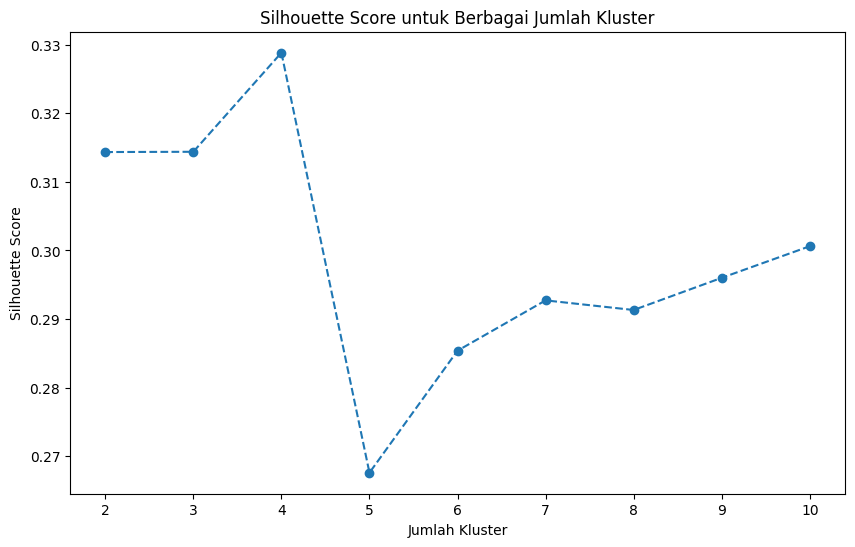

                                        Product Name Product ID  \
0  Women's adidas Originals NMD_Racer Primeknit S...     AH2430   
1               Women's adidas Originals Sleek Shoes     G27341   
2                  Women's adidas Swim Puka Slippers     CM0081   
3   Women's adidas Sport Inspired Questar Ride Shoes     B44832   
4           Women's adidas Originals Taekwondo Shoes     D98205   

   Listing Price  Sale Price  Discount                    Brand  Rating  \
0          14999        7499        50  Adidas Adidas ORIGINALS     4.8   
1           7599        3799        50         Adidas ORIGINALS     3.3   
2            999         599        40        Adidas CORE / NEO     2.6   
3           6999        3499        50        Adidas CORE / NEO     4.1   
4           7999        3999        50         Adidas ORIGINALS     3.5   

   Reviews  Cluster  
0       41        1  
1       24        0  
2       37        0  
3       35        0  
4       72        0  
Hasil clusteri

In [ ]:
# Visualisasi silhouette score untuk setiap jumlah kluster
plt.figure(figsize=(10, 6))
plt.plot(range_n_clusters[:len(silhouette_avg_scores)], silhouette_avg_scores, marker='o', linestyle='--')
plt.xlabel('Jumlah Kluster')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score untuk Berbagai Jumlah Kluster')
plt.show()

# Menjalankan KMeans dengan jumlah kluster optimal
kmeans = KMeans(n_clusters=best_n_clusters, n_init=10, random_state=10)
df['Cluster'] = kmeans.fit_predict(df_scaled)

# Menampilkan hasil clustering
print(df.head())

# Simpan hasil clustering ke file CSV
df.to_csv('Pekan3_clustered.csv', index=False)
print("Hasil clustering telah disimpan ke 'Pekan3_clustered.csv'")